# MARKETING ANALYTICS EM PYTHON
---

Obtenha as habilidades de Python necessárias para tomar melhores decisões de marketing orientadas por dados. Nesta faixa, você aprenderá a analisar o desempenho da campanha, medir o envolvimento do cliente e prever a perda de clientes. Trabalhando com dados do mundo real, incluindo transações de varejo, você descobrirá como analisar dados de mídia social, extrair insights de dados de texto e obter habilidades de análise de cesta de mercado que o ajudarão a entender melhor seus clientes. Você também usará modelos estatísticos e aprendizado de máquina para prever o valor da vida útil do cliente. Por meio de atividades práticas, você usará pacotes populares como pandas, Matplotlib, tweepy, NLTK, seaborn, NumPy, SciPy e scikit-learn para ajudá-lo a melhorar a estratégia de marketing da sua empresa. Ao final da trilha, você estará pronto para navegar no mundo do marketing usando Python.

## 1. Pandas
---

### 1.1 Importando o dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/marketing.csv')

### 1.2 Examinando os dados

In [3]:
# Primeiras 5 observações do dataframe
df.head()

,Unnamed: 0,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
0,0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
1,1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
2,2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
3,3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
4,4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes


In [4]:
# Sumário de estatísticas de todas as variáveis
df.describe()

,Unnamed: 0,DoW,channel_code
count,10038.000000,1857.000000,1857.000000
mean,5018.500000,2.529348,2.632202
std,2897.865335,1.937417,1.211430
min,0.000000,0.000000,1.000000
25%,2509.250000,1.000000,2.000000
50%,5018.500000,2.000000,2.000000
75%,7527.750000,4.000000,3.000000
max,10037.000000,6.000000,5.000000


In [5]:
# Quantidade de valores não nulos em cada variável e seus tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10038 entries, 0 to 10037
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10038 non-null  int64  
 1   user_id              10038 non-null  object 
 2   date_served          10022 non-null  object 
 3   marketing_channel    10023 non-null  object 
 4   variant              10038 non-null  object 
 5   converted            10038 non-null  bool   
 6   language_displayed   10038 non-null  object 
 7   language_preferred   10038 non-null  object 
 8   age_group            10038 non-null  object 
 9   date_subscribed      1857 non-null   object 
 10  date_canceled        577 non-null    object 
 11  subscribing_channel  1857 non-null   object 
 12  is_retained          10038 non-null  bool   
 13  DoW                  1857 non-null   float64
 14  channel_code         1857 non-null   float64
 15  is_correct_lang      10038 non-null 

### 1.3 Modificando dados das colunas

In [6]:
# Convertendo is_retained para booleano
df['is_retained'] = df['is_retained'].astype('bool')

print(df['is_retained'].dtypes)

bool


In [7]:
# Mapeando channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Adicionando channel_code, que mapeia os valores na coluna subscribe_channel para 
# uma escala numérica usando o dicionário channel_dict
df['channel_code'] = df['subscribing_channel'].map(channel_dict)

# Adicionando a coluna is_correct_lang 
df['is_correct_lang'] = np.where(df['language_preferred'] == df['language_displayed'], 'Yes', 'No')

In [8]:
# Importando marketing.csv com colunas de data
df = pd.read_csv('datasets/marketing.csv', parse_dates=['date_served','date_subscribed','date_canceled'])

# Adicionando a coluna DoW 
df['DoW'] = df['date_subscribed'].dt.dayofweek

In [9]:
df.head()

,Unnamed: 0,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
0,0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
1,1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
2,2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
3,3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
4,4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes


### 1.4 Análise exploratória inicial

In [10]:
# Quantos usuários veem marketing assets por data
daily_users = df.groupby(['date_served'])['user_id'].nunique()
print(daily_users)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
2018-02-06      1
Name: user_id, dtype: int64


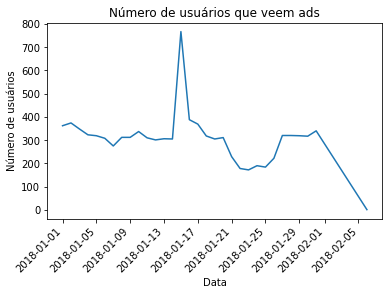

In [11]:
daily_users.plot()
plt.title('Número de usuários que veem ads')
plt.xlabel('Data')
plt.ylabel('Número de usuários')
plt.xticks(rotation=45)
plt.show()

## 2. Análise Exploratória e Estatísticas 
---

### 2.1 Métricas de marketing

In [12]:
# Selecionando subscribers
subscribers = df[df['converted'] == True]['user_id'].nunique()

# Selecionando número total de pessoas 
total = df['user_id'].nunique()

# Calculando taxa de conversão
conv_rate = subscribers / total
print('Taxa de conversão:', round(conv_rate*100, 2), '%')

Taxa de conversão: 14.09 %


In [13]:
# Selecionando retenções
retained = df[df['is_retained'] == True]['user_id'].nunique()

# Selecionando subscribers
subscribers = df[df['converted'] == True]['user_id'].nunique()              

# Calculando taxa de retenção 
retention = retained / subscribers 
print('Taxa de retenção:', round(retention*100, 2), '%')              

Taxa de retenção: 676.5 %


### 2.2 Segmentação de clientes

In [14]:
# Selecionando clientes House ads
house_ads = df[df['subscribing_channel'] == 'House Ads']

# Selecionando retenções
retained = house_ads[house_ads['is_retained'] == True]['user_id'].nunique()

# Selecionando subscribers
subscribers = house_ads[house_ads['converted'] == True]['user_id'].nunique() 

# Calculando taxa de retenção
retention = retained / subscribers 
print('Taxa de retenção:', round(retention*100, 2), '%') 

Taxa de retenção: 58.05 %


In [15]:
# Agrupando por subscribing_channel e calculando número de retenções por canal
retained = df[df['is_retained'] == True].groupby(['subscribing_channel'])['user_id'].nunique()
print(retained)

subscribing_channel
Email        142
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [16]:
# Agrupando por subscribing_channel e calculando número de subscribers
subscribers = df[df['converted'] == True].groupby(['subscribing_channel'])['user_id'].nunique()
print(subscribers)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [17]:
# Calculando porcentagem da taxa de retenção 
channel_retention_rate = (retained / subscribers) * 100
print(channel_retention_rate)

subscribing_channel
Email        88.198758
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


### 2.3 Comparando taxa de conversão por idioma

In [18]:
# Isolar falantes de inglês
english_speakers = df[df['language_displayed'] == 'English']

# Calcular o número total de usuários que falam inglês
total = english_speakers['user_id'].nunique()

# Calcule o número de falantes de inglês subscribers
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique() 

# Calculando taxa de retenção 
conversion_rate = subscribers/total
print('Taxa de conversão de falantes de inglês:', round(conversion_rate*100,2), '%')

Taxa de conversão de falantes de inglês: 13.13 %


In [19]:
# Agrupando por language_displayed e contando usuários únicos
total = df.groupby('language_displayed')['user_id'].nunique()

# Agrupando por language_displayed e contando conversões 
subscribers = df[df['converted'] == True].groupby(['language_displayed'])['user_id'].nunique() 

# Calcule a taxa de conversão para todos os idiomas
language_conversion_rate = subscribers / total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.131260
German     0.706667
Spanish    0.200000
Name: user_id, dtype: float64


### 2.4 Agregando por data

In [20]:
# Agrupando por date_served e contando usuários únicos
total = df.groupby('date_served')['user_id'].nunique()

# Agrupando por date_served e contando conversões 
subscribers = df[df['converted'] == True].groupby(['date_served'])['user_id'].nunique() 

# Calcule a taxa de conversão por dia
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
2018-02-06         NaN
Name: user_id, dtype: float64


### 2.5 Comparando taxa de conversão por idiomas

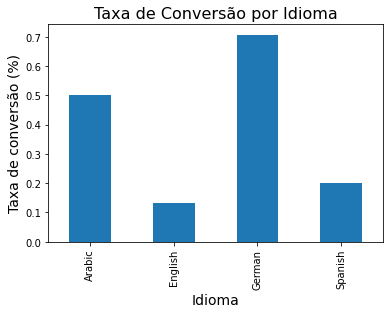

In [21]:
language_conversion_rate.plot(kind='bar')
plt.title('Taxa de Conversão por Idioma', size=16)
plt.xlabel('Idioma', size=14)
plt.ylabel('Taxa de conversão (%)', size=14)
plt.show()

In [22]:
# Agrupando por date_subscribed e contando usuários únicos
total = df.groupby('date_subscribed')['user_id'].nunique()

# Agrupando por is_retained e contando conversões 
subscribers = df[df['is_retained'] == True].groupby(['date_subscribed'])['user_id'].nunique() 

# Calcule a taxa de retenção por dia
daily_retention_rate = subscribers/total
print(daily_retention_rate)

date_subscribed
2018-01-01    0.777778
2018-01-02    0.702703
2018-01-03    0.729730
2018-01-04    0.500000
2018-01-05    0.575000
2018-01-06    0.756757
2018-01-07    0.526316
2018-01-08    0.638889
2018-01-09    0.675000
2018-01-10    0.682927
2018-01-11    0.615385
2018-01-12    0.391304
2018-01-13    0.500000
2018-01-14    0.615385
2018-01-15    0.714286
2018-01-16    0.701923
2018-01-17    0.616279
2018-01-18    0.733333
2018-01-19    0.684211
2018-01-20    0.809524
2018-01-21    0.761905
2018-01-22    0.772727
2018-01-23    0.714286
2018-01-24    0.652174
2018-01-25    0.565217
2018-01-26    0.800000
2018-01-27    0.571429
2018-01-28    0.666667
2018-01-29    0.750000
2018-01-30    0.714286
2018-01-31    0.666667
2018-02-17    1.000000
Name: user_id, dtype: float64


In [23]:
# Resetando index para transformar a Series em DataFrame
daily_retention_rate = pd.DataFrame(daily_retention_rate.reset_index())

# Renomeando colunas
daily_retention_rate.columns = ['date_subscribed', 'retention_rate']

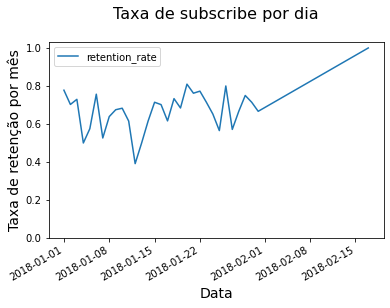

In [24]:
daily_retention_rate.plot('date_subscribed', 'retention_rate')

plt.title('Taxa de subscribe por dia\n', size=16)
plt.ylabel('Taxa de retenção por mês', size=14)
plt.xlabel('Data', size=14)

plt.ylim(0)
plt.show()

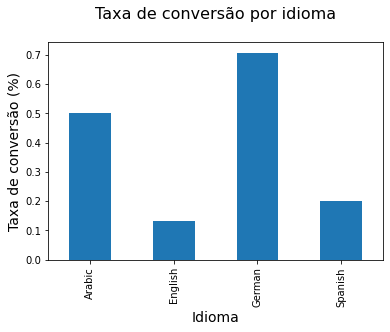

In [25]:
language_conversion_rate.plot(kind='bar')

plt.title('Taxa de conversão por idioma\n', size = 16)
plt.ylabel('Taxa de conversão (%)', size = 14)
plt.xlabel('Idioma', size = 14)

plt.show()

In [26]:
# Agrupando por date_served e contando usuários únicos
total = df.groupby(['date_served'])['user_id'].nunique()

# Agrupando por date_served e calculando subscribers
subscribers = df[df['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculando a taxa de conversão para todos os idiomas
daily_conversion_rates = subscribers/total

In [27]:
# Resetando index para transformar a Series em DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())

# Renomeando colunas
daily_conversion_rate.columns = ['date_served', 'conversion_rate']

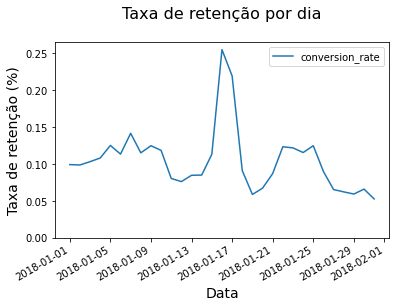

In [28]:
# Criando um gráfico de linhas usando daily_conversion_rate
daily_conversion_rate.plot('date_served', 'conversion_rate')

plt.title('Taxa de retenção por dia\n', size = 16)
plt.ylabel('Taxa de retenção (%)', size = 14)
plt.xlabel('Data', size = 14)

plt.ylim(0)
plt.show()

In [29]:
language = df.groupby(['date_served','language_preferred'])['user_id'].count()
print(language.head(10))

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
             English               397
             German                  6
             Spanish                10
2018-01-03   Arabic                  3
             English               374
Name: user_id, dtype: int64


In [30]:
language = pd.DataFrame(language.unstack(level=1))
print(language.head())

language_preferred  Arabic  English  German  Spanish
date_served                                         
2018-01-01             4.0    355.0     5.0     11.0
2018-01-02             4.0    397.0     6.0     10.0
2018-01-03             3.0    374.0     3.0      8.0
2018-01-04             2.0    318.0     2.0     14.0
2018-01-05             1.0    314.0     2.0     14.0


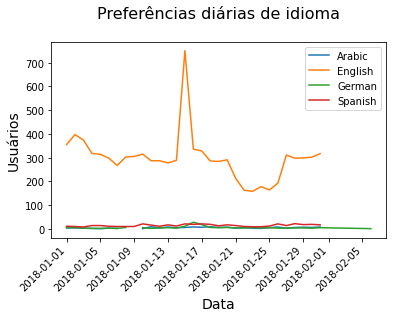

In [31]:
language.plot()
plt.title('Preferências diárias de idioma\n', size = 16)
plt.xlabel('Data', size = 14)
plt.ylabel('Usuários', size = 14)
plt.legend(loc = 'upper right', labels = language.columns.values)
plt.xticks(rotation=45)
plt.show()

In [33]:
language_age = df.groupby(['language_preferred', 'age_group'])['user_id'].count()
language_age = pd.DataFrame(language_age.unstack(level=1))
print(language_age.head())

age_group           0-18 years  19-24 years  24-30 years  30-36 years  \
language_preferred                                                      
Arabic                      19           26           19           19   
English                   1421         1560         1442         1251   
German                      32           29           35           16   
Spanish                     68           67           72           69   

age_group           36-45 years  45-55 years  55+ years  
language_preferred                                       
Arabic                       19           21         22  
English                    1260         1240       1101  
German                       19           25         12  
Spanish                      55           67         52  


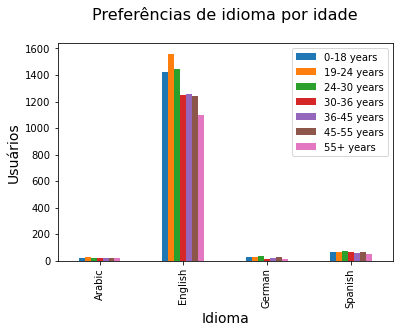

In [34]:
language_age.plot(kind='bar')
plt.title('Preferências de idioma por idade\n', size = 16)
plt.xlabel('Idioma', size = 14)
plt.ylabel('Usuários', size = 14)
plt.legend(loc = 'upper right', labels = language_age.columns.values)
plt.show()

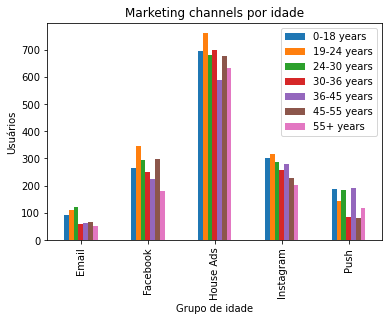

In [35]:
channel_age = df.groupby(['marketing_channel', 'age_group'])['user_id'].count()

channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels por idade')
plt.xlabel('Grupo de idade')
plt.ylabel('Usuários')
plt.legend(loc = 'upper right', labels = channel_age_df.columns.values)
plt.show()

In [38]:
# Contando as inscrições por canal e dia
retention_total = df.groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [39]:
# Soma de retenção por canal e data de inscrição
retention_subs = df[df['is_retained'] == True].groupby(['date_subscribed',\
                                            'subscribing_channel'])['user_id'].nunique()
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


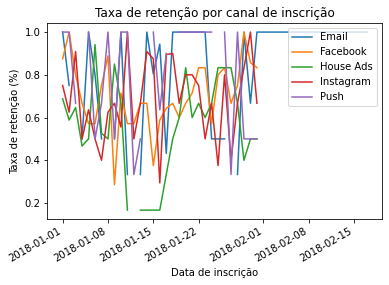

In [41]:
retention_rate = retention_subs / retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

retention_rate_df.plot()

plt.title('Taxa de retenção por canal de inscrição')
plt.xlabel('Data de inscrição')
plt.ylabel('Taxa de retenção (%)')
plt.legend(loc = 'upper right', labels = retention_rate_df.columns.values)
plt.show()